# HW) boston 집값 예측(과제 ~5/17 오전 10시전까지)

In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# 데이터 분리
import random
random.seed(1212)
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  # 평가데이터 25%

In [4]:
# correlation
import pandas as pd
df = pd.DataFrame(X)
corr = df.corr(method = "pearson")
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
1  -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
2   0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
3  -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
4   0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
5  -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
6   0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
7  -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
8   0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
9   0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
10  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
11 -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
12  0.455621

## OLS

In [5]:
from statsmodels.formula.api import ols
res = ols('y ~ X', data = boston).fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 14 May 2022   Prob (F-statistic):          6.72e-135
Time:                        04:30:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
X[0]          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
X[1]           0.0464      0.014      3.382      0.001       0.019       0.073
X[2]           0.0206      0.061      0.334      0.738      -0.100       0.141
X[3]           2.6867      0.862      3.118      0.002       0.994       4.380
X[4]         -17.7666      3.820     -4.651      0.000     -25.272     -10.262
X[5]           3.8099      0.418      9.116      0.000       2.989       4.631
X[6]           0.0007      0.013      0.052      0.958      -0.025       0.027
X[7]          -1.4756      0.199     -7.398      0.000      -1.867      -1.084
X[8]           0.3060      0.066      4.613      0.000       0.176       0.436
X[9]          -0.0123      0.004     -3.280      0.001      -0.020      -0.005
X[10]         -0.9527      0.131     -7.283      0.000      -1.210      -0.696
X[11]          0.0093      0.003      3.467      0.001       0.004       0.015
X[12]         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ridge

In [6]:
import numpy as np
n_alphas = 200
alphas_Ridge = np.logspace(1, 10, n_alphas)

In [7]:
from sklearn.linear_model import Ridge
coefs = []
for a in alphas_Ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

No handles with labels found to put in legend.


(28183829312.644493, 3.548133892335755, -1.1522149247769602, 5.750749428938105)

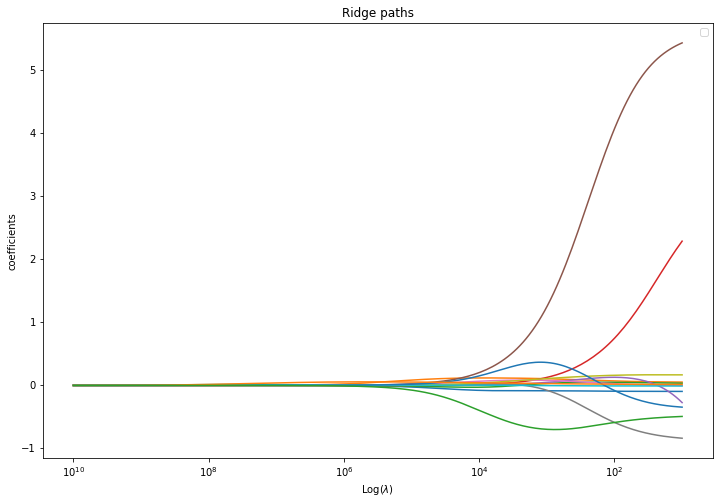

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize = (12,8))

ax = plt.gca()

ax.plot(alphas_Ridge, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Ridge paths')
plt.legend()
plt.axis('tight')

In [9]:
ridge_param = [{'alpha' : alphas_Ridge}]

In [13]:
import multiprocessing
ridge_gs = GridSearchCV(
    estimator  = Ridge(),
    param_grid=ridge_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [14]:
ridge_gs.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(estimator=Ridge(), n_jobs=2,
             param_grid=[{'alpha': array([1.00000000e+01, 1.10975250e+01, 1.23155060e+01, 1.36671636e+01,
       1.51671689e+01, 1.68318035e+01, 1.86791360e+01, 2.07292178e+01,
       2.30043012e+01, 2.55290807e+01, 2.83309610e+01, 3.14403547e+01,
       3.48910121e+01, 3.87203878e+01, 4.29700470e+01, 4.76861170e+01,
       5.29197874e+01, 5.87278661e+01, 6.51733960e+...
       1.38262217e+09, 1.53436841e+09, 1.70276917e+09, 1.88965234e+09,
       2.09704640e+09, 2.32720248e+09, 2.58261876e+09, 2.86606762e+09,
       3.18062569e+09, 3.52970730e+09, 3.91710149e+09, 4.34701316e+09,
       4.82410870e+09, 5.35356668e+09, 5.94113398e+09, 6.59318827e+09,
       7.31680714e+09, 8.11984499e+09, 9.01101825e+09, 1.00000000e+10])}],
             scoring='neg_mean_squared_error', verbose=True)

In [15]:
ridge_model = ridge_gs.best_estimator_
ridge_model.fit(X_train,y_train)
predict = ridge_model.predict(X_test)

In [16]:
## RMSE
df = pd.DataFrame(y_test)
print(df.shape)  # y_test의 개수 : 127

import math
RMSE = math.sqrt(np.sum((y_test-predict)**2)/127)
print(RMSE)

(127, 1)
4.414867445126733


## Lasso

In [17]:
data = pd.DataFrame(boston['data'], columns = boston['feature_names'])  
m, n = data.shape

No handles with labels found to put in legend.


(0.26142540283513344,
 14076.049361381938,
 -0.8978049282337603,
 5.218059969585444)

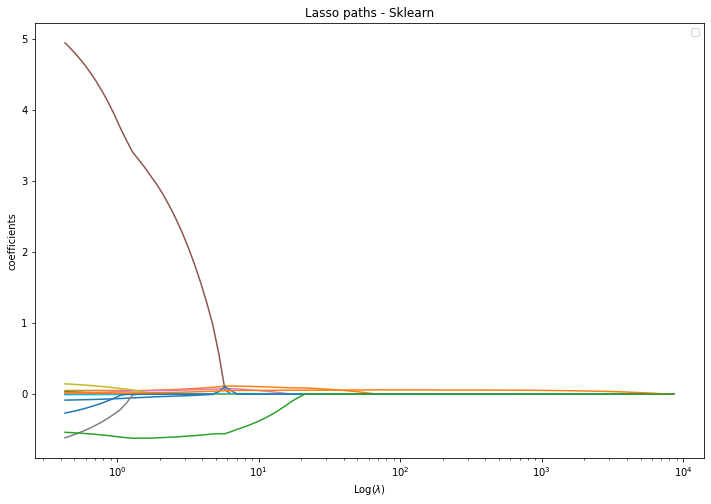

In [18]:
from sklearn.linear_model import Lasso, lasso_path
eps = 5e-5

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)

plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('Lasso paths - Sklearn')
plt.legend()
plt.axis('tight')

In [19]:
lasso_param = [{'alpha' : alphas_lasso}]

In [20]:
lasso_gs = GridSearchCV(
    estimator  = Lasso(),
    param_grid=lasso_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [21]:
lasso_gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=Lasso(), n_jobs=2,
             param_grid=[{'alpha': array([8.57885409e+03, 7.76219473e+03, 7.02327682e+03, 6.35469980e+03,
       5.74976760e+03, 5.20242160e+03, 4.70717990e+03, 4.25908247e+03,
       3.85364143e+03, 3.48679612e+03, 3.15487246e+03, 2.85454609e+03,
       2.58280913e+03, 2.33694001e+03, 2.11447628e+03, 1.91318986e+03,
       1.73106479e+03, 1.56627702e+03, 1.41717613e+...
       2.86978583e+00, 2.59659813e+00, 2.34941638e+00, 2.12576496e+00,
       1.92340392e+00, 1.74030653e+00, 1.57463900e+00, 1.42474209e+00,
       1.28911454e+00, 1.16639798e+00, 1.05536336e+00, 9.54898619e-01,
       8.63997563e-01, 7.81749785e-01, 7.07331539e-01, 6.39997497e-01,
       5.79073283e-01, 5.23948716e-01, 4.74071703e-01, 4.28942704e-01])}],
             scoring='neg_mean_squared_error', verbose=True)

In [22]:
lasso_gs.best_estimator_

Lasso(alpha=0.42894270448548816)

In [23]:
lasso_model = lasso_gs.best_estimator_
lasso_model.fit(X_train,y_train)
predict = lasso_model.predict(X_test)

In [24]:
## RMSE
import math
RMSE = math.sqrt(np.sum((y_test-predict)**2)/127)
print(RMSE)

4.579498770036072


## Elastic net

No handles with labels found to put in legend.


(0.522850805670267, 28152.09872276388, -0.857739165104964, 3.341137324827453)

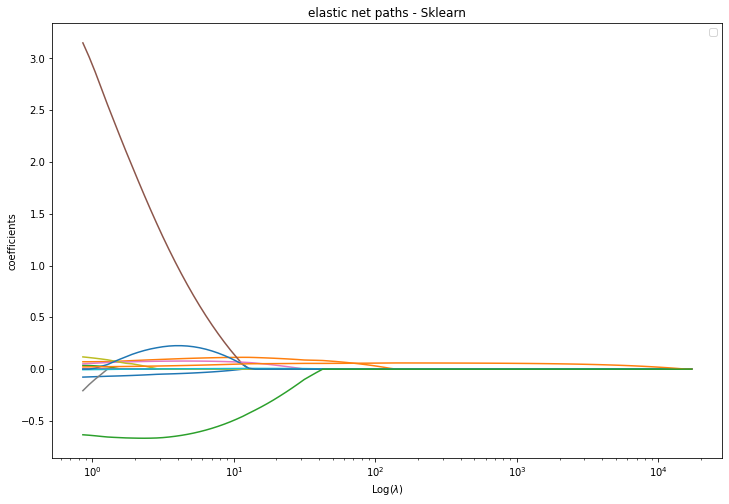

In [25]:
from sklearn.linear_model import enet_path, ElasticNet
eps = 5e-5

alphas_enet, coefs_enet, _ = enet_path(X_train, y_train, eps=eps)

plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(alphas_enet, coefs_enet[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('coefficients')
plt.title('elastic net paths - Sklearn')
plt.legend()
plt.axis('tight')

In [26]:
enet_param = [{'alpha' : alphas_enet}]

In [27]:
enet_gs = GridSearchCV(
    estimator  = ElasticNet(),
    param_grid=enet_param,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True,
    scoring = 'neg_mean_squared_error'
)

In [28]:
enet_gs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=ElasticNet(), n_jobs=2,
             param_grid=[{'alpha': array([1.71577082e+04, 1.55243895e+04, 1.40465536e+04, 1.27093996e+04,
       1.14995352e+04, 1.04048432e+04, 9.41435980e+03, 8.51816494e+03,
       7.70728285e+03, 6.97359225e+03, 6.30974492e+03, 5.70909218e+03,
       5.16561825e+03, 4.67388003e+03, 4.22895256e+03, 3.82637972e+03,
       3.46212958e+03, 3.13255403e+03, 2.83435...
       5.73957166e+00, 5.19319625e+00, 4.69883276e+00, 4.25152992e+00,
       3.84680784e+00, 3.48061306e+00, 3.14927799e+00, 2.84948418e+00,
       2.57822908e+00, 2.33279597e+00, 2.11072672e+00, 1.90979724e+00,
       1.72799513e+00, 1.56349957e+00, 1.41466308e+00, 1.27999499e+00,
       1.15814657e+00, 1.04789743e+00, 9.48143405e-01, 8.57885409e-01])}],
             scoring='neg_mean_squared_error', verbose=True)

In [29]:
enet_model = enet_gs.best_estimator_
enet_model.fit(X_train,y_train)
predict = enet_model.predict(X_test)

In [30]:
## RMSE
import math
RMSE = math.sqrt(np.sum((y_test-predict)**2)/127)
print(RMSE)

4.907081816138917
